In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('crime_data.csv')

df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
df[df.duplicated()]

# No duplicates

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


### Lets analyze the features by creating histograms to understand the distribution

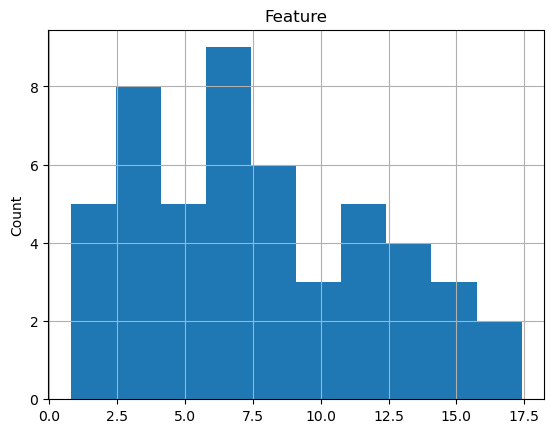

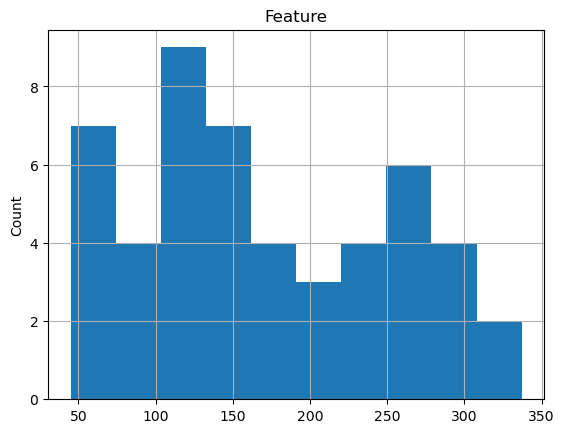

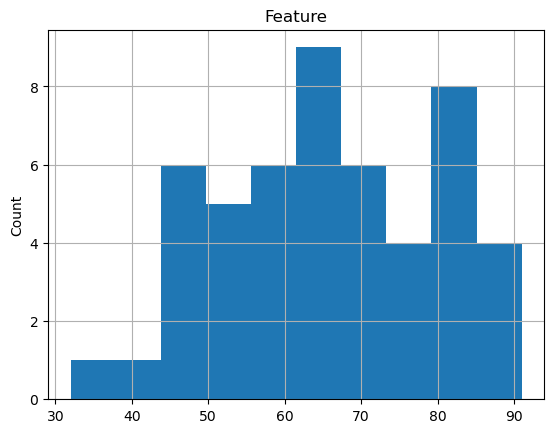

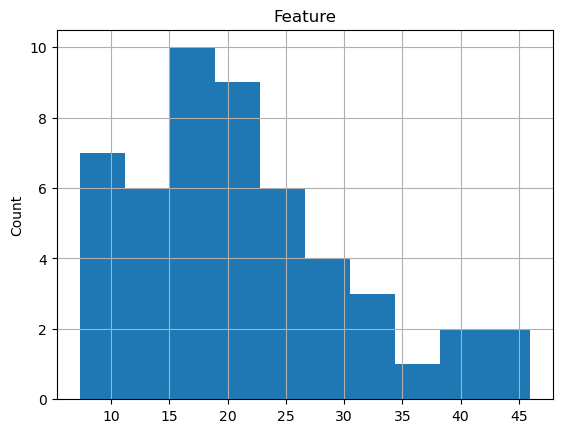

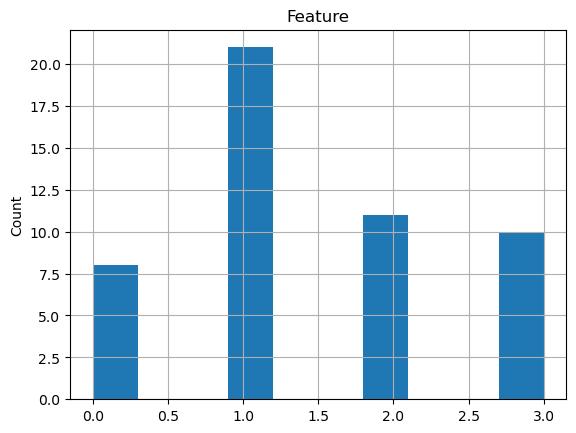

In [42]:
data = df.iloc[:,1:]

for n in data.columns:
    data=data.copy()
    data[n].hist(bins=10)
    plt.ylabel('Count')
    plt.title('Feature')
    plt.show()

<Axes: >

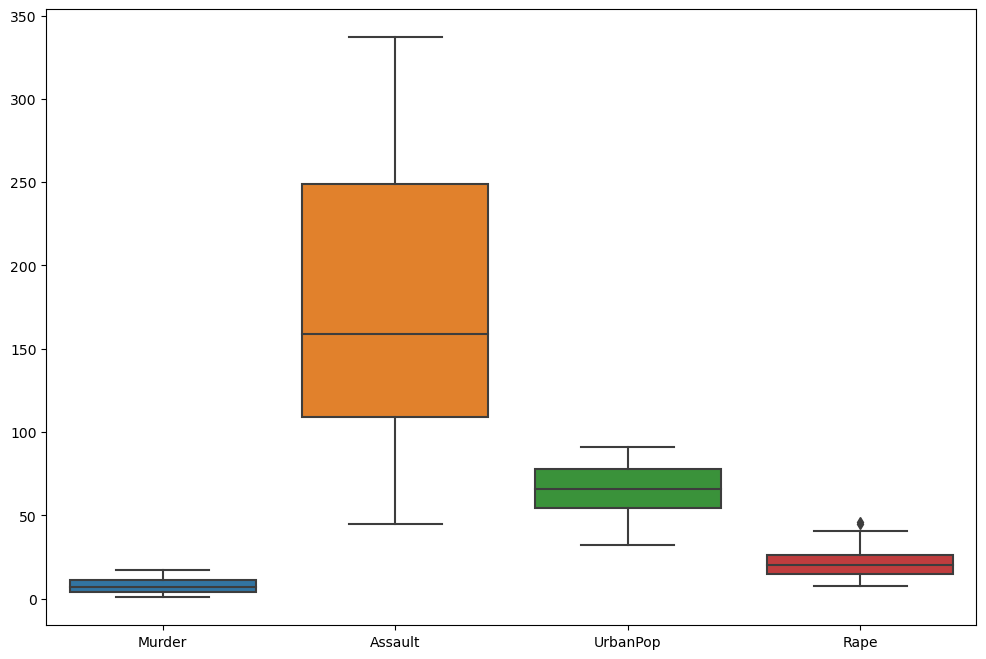

In [9]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8))
sns.boxplot(data=data)

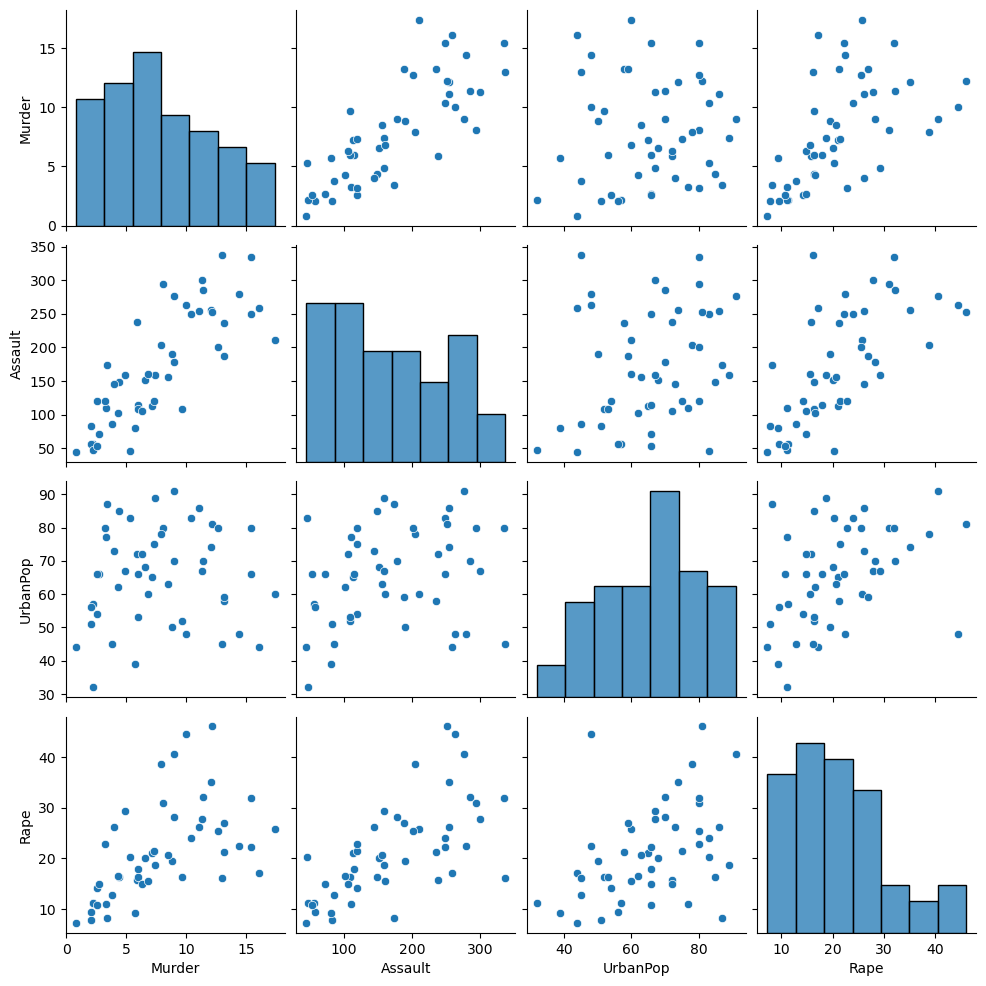

In [30]:
sns.pairplot(data)

In [31]:
data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


### From Correlation we can infer that Assault and Murder have strong Correlation.

### Data Values are ranging widely, Hence we need to Scale the Data.

In [10]:
#Sacling the Data ( Standard Scaler)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])

scaled_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

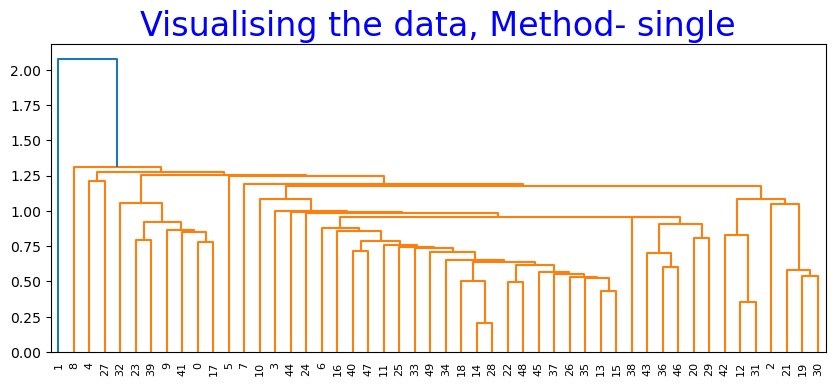

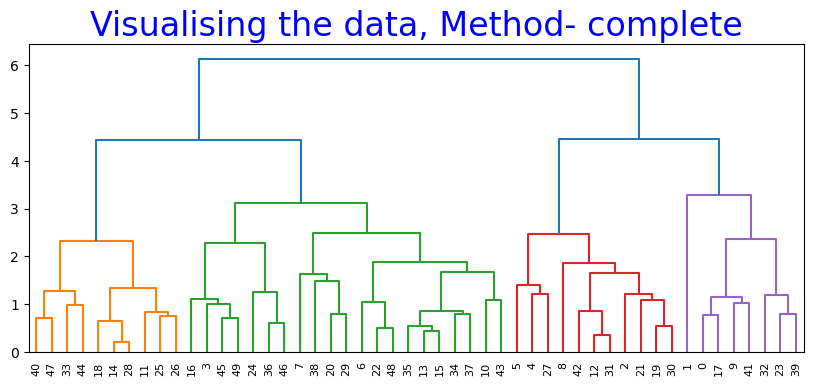

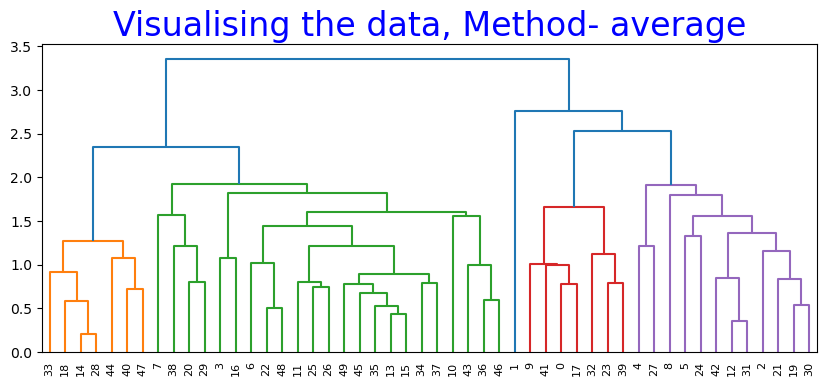

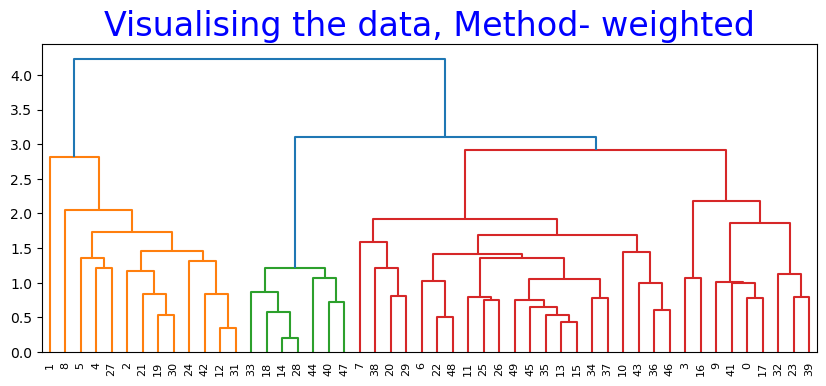

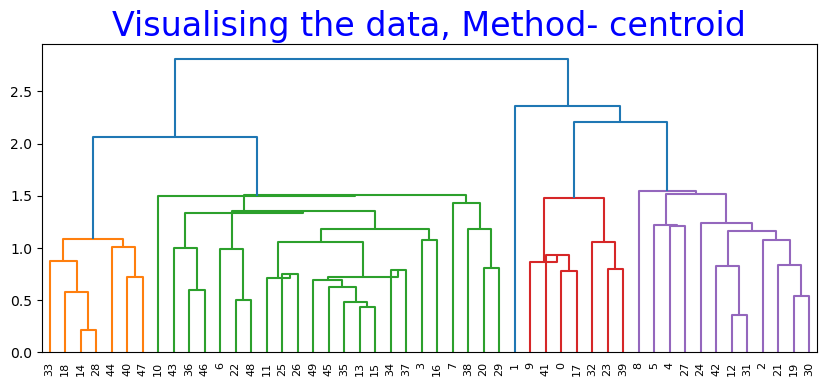

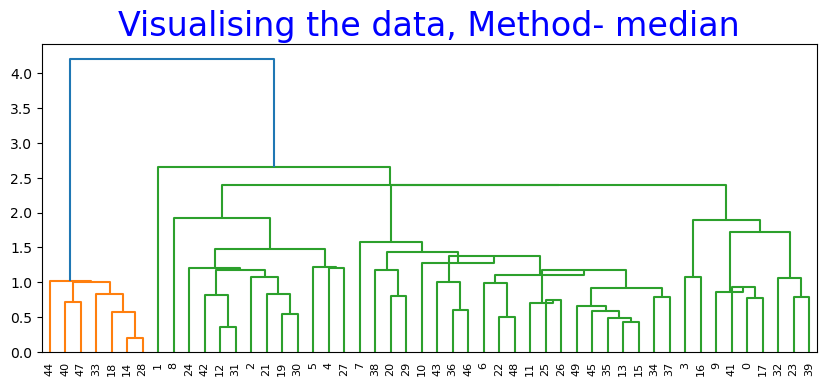

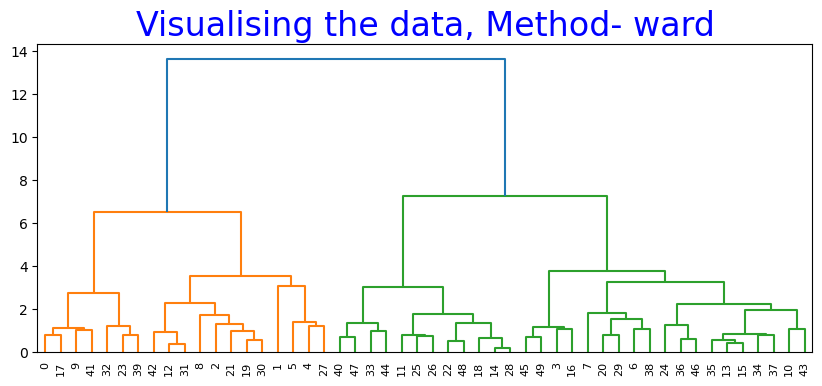

In [37]:
# Applying Dendrogram on data. Or you may apply it on Standardized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(10, 4)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(scaled_df, method = methods,optimal_ordering=False))

### Finalizing the Complete method, as the clustering seems to be having good similarity(y-axis distance)

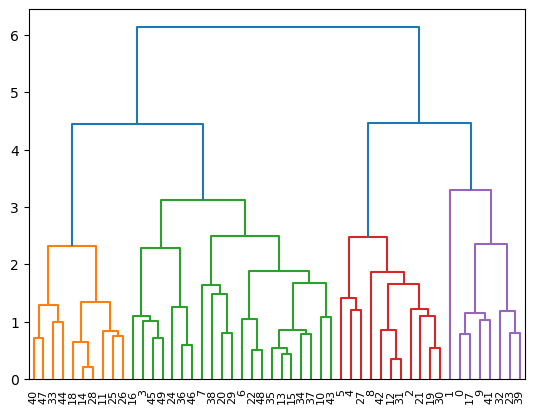

In [34]:
#Create Dendogram

dendrogram = sch.dendrogram(sch.linkage(scaled_df,method ='complete'))

### Dendogram is suggesting to create 4 clusters.

In [12]:
#create Clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage ='complete')

In [13]:
#save clusters for chart

y_hc = hc.fit_predict(scaled_df)
Clusters = pd.DataFrame(y_hc, columns=['Clusters'])

Clusters

C:\Users\sampa\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Clusters
0,0
1,0
2,2
3,1
4,2
5,2
6,1
7,1
8,2
9,0


In [15]:
df['hc_cluster Id'] = Clusters
df.rename(columns={'Unnamed: 0':'State'},inplace=True)
df

,State,Murder,Assault,UrbanPop,Rape,hc_cluster Id
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


# K-Means Clustering

In [49]:
"""K-Means Clustering"""

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [50]:
K_df = pd.read_csv('crime_data.csv')

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_K_df = scaler.fit_transform(K_df.iloc[:,1:])

In [52]:
# To find optimum number of Cluster

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, random_state =0)
  kmeans.fit(scaled_K_df)
  wcss.append(kmeans.inertia_)

C:\Users\sampa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sampa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sampa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sampa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

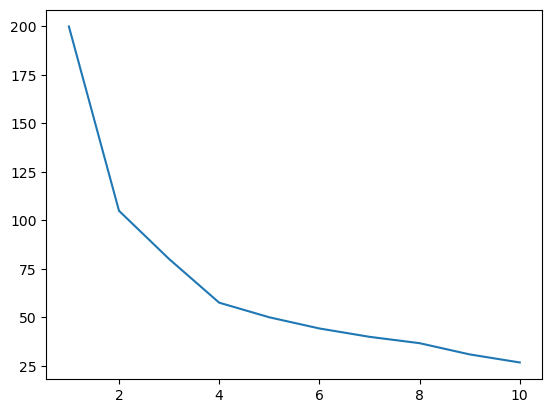

In [53]:
a = range(1,11)

plt.plot(a,wcss)

### From the above Elbow chart we can use around 4 clusters

In [54]:
#Build Cluster Algorithm

clusters_new = KMeans(4, random_state=0)
clusters_new.fit(scaled_K_df)

clusters_new.labels_

C:\Users\sampa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sampa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 3, 3, 1, 3, 3, 2, 2, 3, 1, 2, 0, 3, 2, 0, 2, 0, 1, 0, 3, 2, 3,
       0, 1, 3, 0, 0, 3, 0, 2, 3, 3, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 3, 2,
       0, 2, 2, 0, 0, 2])

In [55]:
K_df['Cluster ID']=clusters_new.labels_
K_df.rename(columns={'Unnamed: 0':'State'},inplace=True)
K_df

,State,Murder,Assault,UrbanPop,Rape,Cluster ID
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,1


In [58]:
K_df.groupby('Cluster ID').agg(['mean']).reset_index()

C:\Users\sampa\AppData\Local\Temp\ipykernel_10948\1938605587.py:1: FutureWarning: ['State'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  K_df.groupby('Cluster ID').agg(['mean']).reset_index()


,Cluster ID,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923
1,1,13.937500,243.625000,53.750000,21.412500
2,2,5.656250,138.875000,73.875000,18.781250
3,3,10.815385,257.384615,76.000000,33.192308


### Here is the mean summary of the clusters obtained from K-Means Clustering.

# DBSCAN Clustering.

In [25]:
"""DBSCAN Clustering"""

from sklearn.cluster import DBSCAN

In [26]:
DB_df = pd.read_csv('crime_data.csv')

DB_df = DB_df.iloc[:,1:]

In [27]:
array = DB_df.values

In [28]:
stscaler = StandardScaler()
StdDBdf = stscaler.fit_transform(DB_df)

In [29]:
dbscan = DBSCAN(eps = 1, min_samples = 4)
dbscan.fit(StdDBdf)

# Noisy Samples are given the label -1
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

### There are more number of Noise Points Hence we cannot use the DBSCAN for this Dataset.